In [2]:
import numpy as np 
import pandas as pd 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.io import loadmat
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

# sklearn now has TSNE so we should use that 

# From PyPI
# !pip install tsne

# From Conda
# ! conda install -c conda-forge tsne 

from sklearn.manifold import TSNE

# Load MNIST data

In [3]:
mnist_train = loadmat('mnist/mnist_train.mat')
mnist_test = loadmat('mnist/mnist_test.mat')
X_train = mnist_train['train_X']
y_train = mnist_train['train_labels'].ravel()

y_train[y_train == 10] = 0 # I notice the labels have a value '10'. I update it to '0'
Xs, ys = shuffle(X_train, y_train, n_samples=1000, random_state=0) # Randomly selecting 1000 samples

In [4]:
df_mnist_train = pd.DataFrame(Xs)
df_mnist_train['label']=ys
print(df_mnist_train['label'].unique())

[1 4 0 2 7 6 5 9 8 3]


# Understanding the data

In [5]:
df_mnist_train.head(n=5) # List first five rows

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


### Uncomment the relevant code lines below and execute to print more description about the data

In [6]:
# Information about the data

df_mnist_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 785 entries, 0 to label
dtypes: float64(784), uint8(1)
memory usage: 6.0 MB


In [23]:
# Get the data shape

df_mnist_train.shape

(1000, 785)

In [24]:
# List columns

df_mnist_train.columns

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783, 'label'],
      dtype='object', length=785)

In [25]:
# List counts

df_mnist_train.count()

0        1000
1        1000
2        1000
3        1000
4        1000
         ... 
780      1000
781      1000
782      1000
783      1000
label    1000
Length: 785, dtype: int64

In [26]:
# Print basic statistics of the data
df_mnist_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.465000
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.882895
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.447059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000


In [27]:
# MNIST dataset has ten digits. 

print(df_mnist_train['label'].unique())

[1 4 0 2 7 6 5 9 8 3]


# Plotting Functions

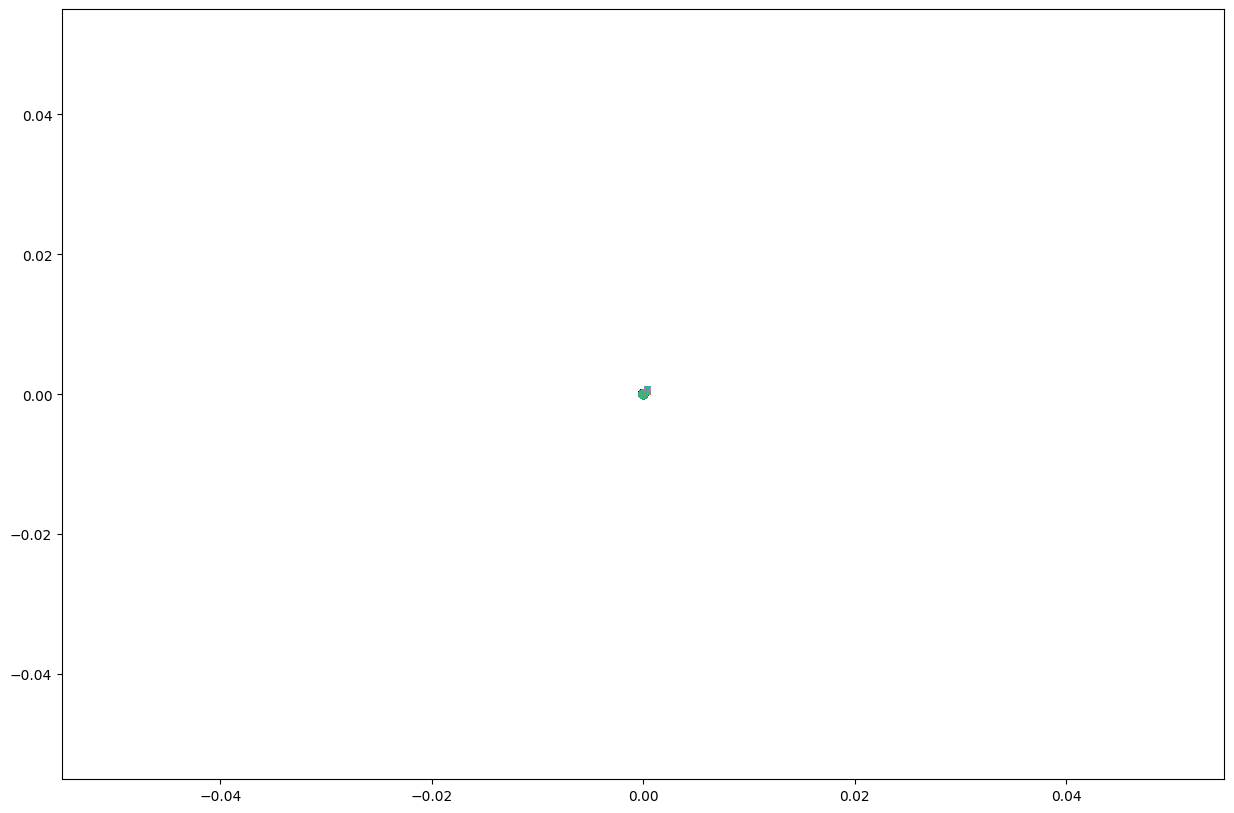

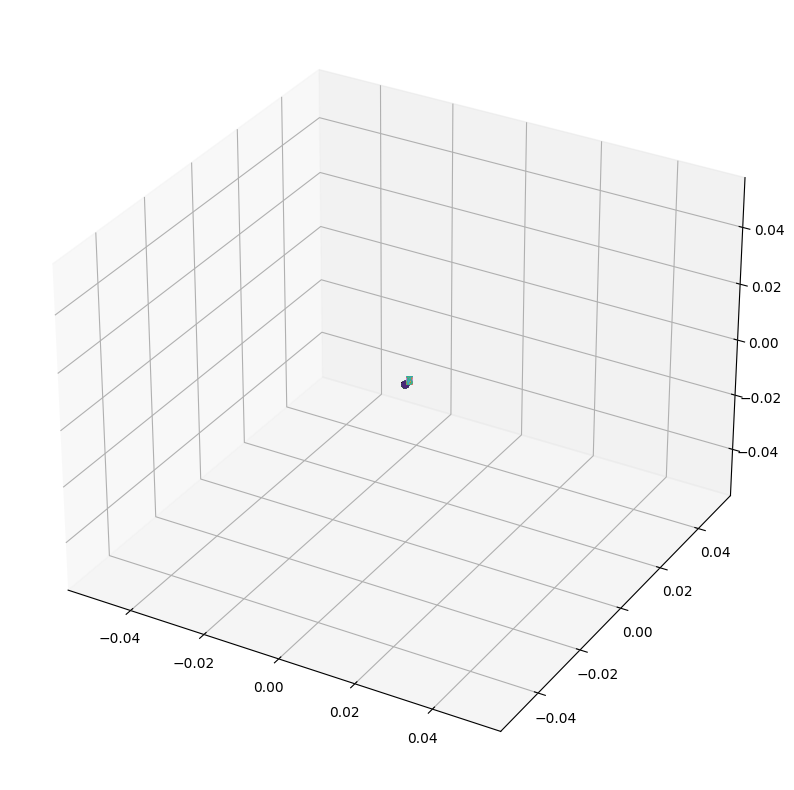

In [30]:
def scatter2d(X, y):
    fig, ax = plt.subplots(figsize=(15,10))
    ax.scatter(X[:,0], X[:,1], c=y)
    palette = sns.color_palette("husl", len(np.unique(y)))

    for i in range(len(y)):
        ax.text(X[i,0], X[i,1], y[i], color=palette[y[i]-1], fontsize='small')
        
def scatter3d(X, y):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    #ax = Axes3D(fig)
    palette = sns.color_palette("husl", len(np.unique(y)))

    ax.mouse_init()
    ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
    for i in range(len(y)):
        ax.text(X[i,0], X[i,1], X[i,2], y[i], color=palette[y[i]-1], fontsize='small')

scatter2d(Xs, ys)
scatter3d(Xs, ys)

# Principal Component Analysis

PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

In [13]:
###
#Your code here. Try PCA with two components
###


### To getter a better understanding of interaction of the dimensions plot the first three PCA dimensions

In [14]:
###
#Your code here. Try PCA with three components
###



# t-SNE on the MNIST dataset

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#

In [15]:
###
#Your code here. Try t-SNE with two components
###


In [16]:
# Plot 2d
# scatter2d(P, ys)

In [17]:
###
#Your code here. Try t-SNE with three components
###


In [18]:
# Plot 3d
# scatter3d(P, ys)

## Exploration Tasks

t-SNE offers others parameters including perplexity. The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Try varying perplexity and observe the changes in the output

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#
    

In [19]:
###
#Your code here
###

# UMAP

In [20]:
# You may need to install UMAP
# Install from terminal as conda install may not always work best from within notebook
# !conda install -c conda-forge umap-learn 

###
#Your code here
###

# Random Projections

In [21]:
###
#Your code here
###

# K-means Clustering with n=10  

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [22]:
###
#Your code here
###